# EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("iris.csv")

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


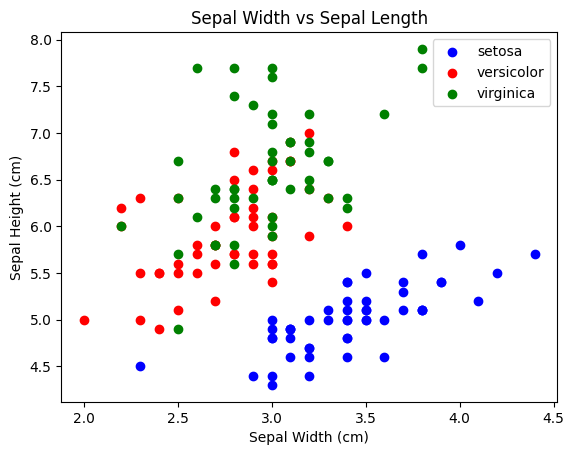

In [ ]:
groups = df.species.unique()
styles = ["b", "r", "g"]
for g, s in zip(groups, styles):
    dfFiltered = df[df.species == g]
    plt.scatter(dfFiltered.sepal_width, dfFiltered.sepal_length, c=s, label=g)
plt.title("Sepal Width vs Sepal Length")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Height (cm)")
plt.legend()

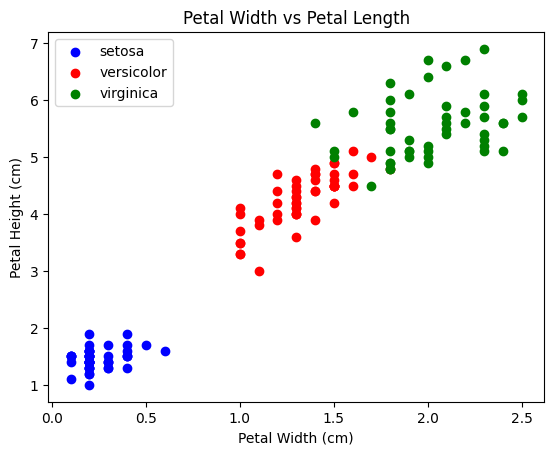

In [ ]:
groups = df.species.unique()
styles = ["b", "r", "g"]
for g, s in zip(groups, styles):
    dfFiltered = df[df.species == g]
    plt.scatter(dfFiltered.petal_width, dfFiltered.petal_length, c=s, label=g)
plt.title("Petal Width vs Petal Length")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Height (cm)")
plt.legend()

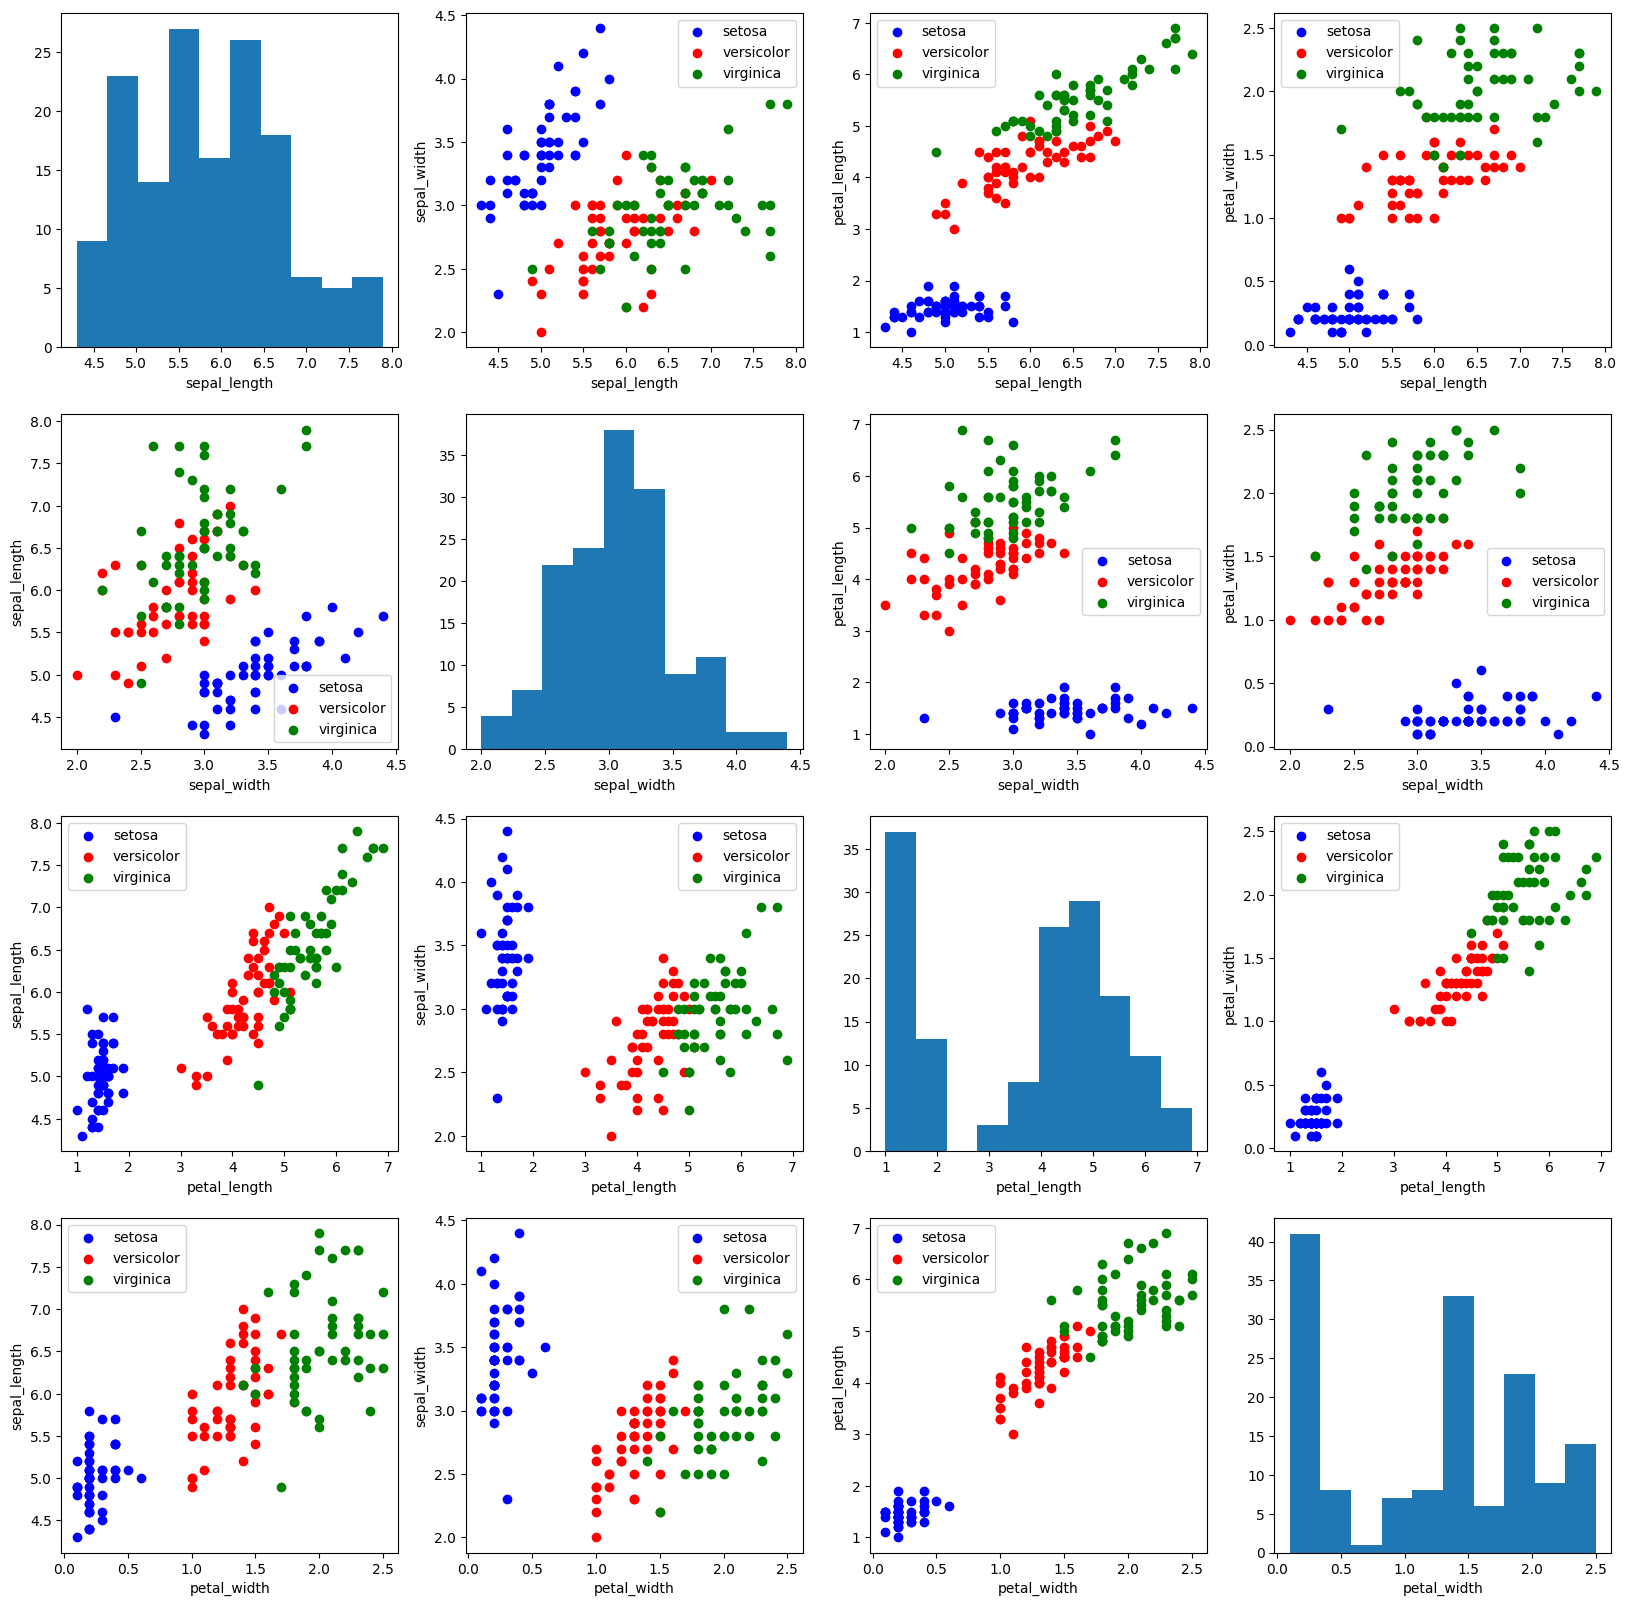

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
cols = df.columns
cols = cols.drop("species")
groups = df.species.unique()
styles = ["b", "r", "g"]

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        ax = axes[i][j]

        if col1 == col2:
            ax.hist(df[col1])
            ax.set_xlabel(f"{col1}")
            continue

        for g, s in zip(groups, styles):
            dfFiltered = df[df.species == g]
            ax.scatter(dfFiltered[col1], dfFiltered[col2], c=s, label=g)

        ax.legend()
        ax.set_xlabel(f"{col1}")
        ax.set_ylabel(f"{col2}")

In [7]:
dfGrouped = df.groupby("species")

In [8]:
dfGrouped.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [9]:
dfGrouped.petal_length.mean()

species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

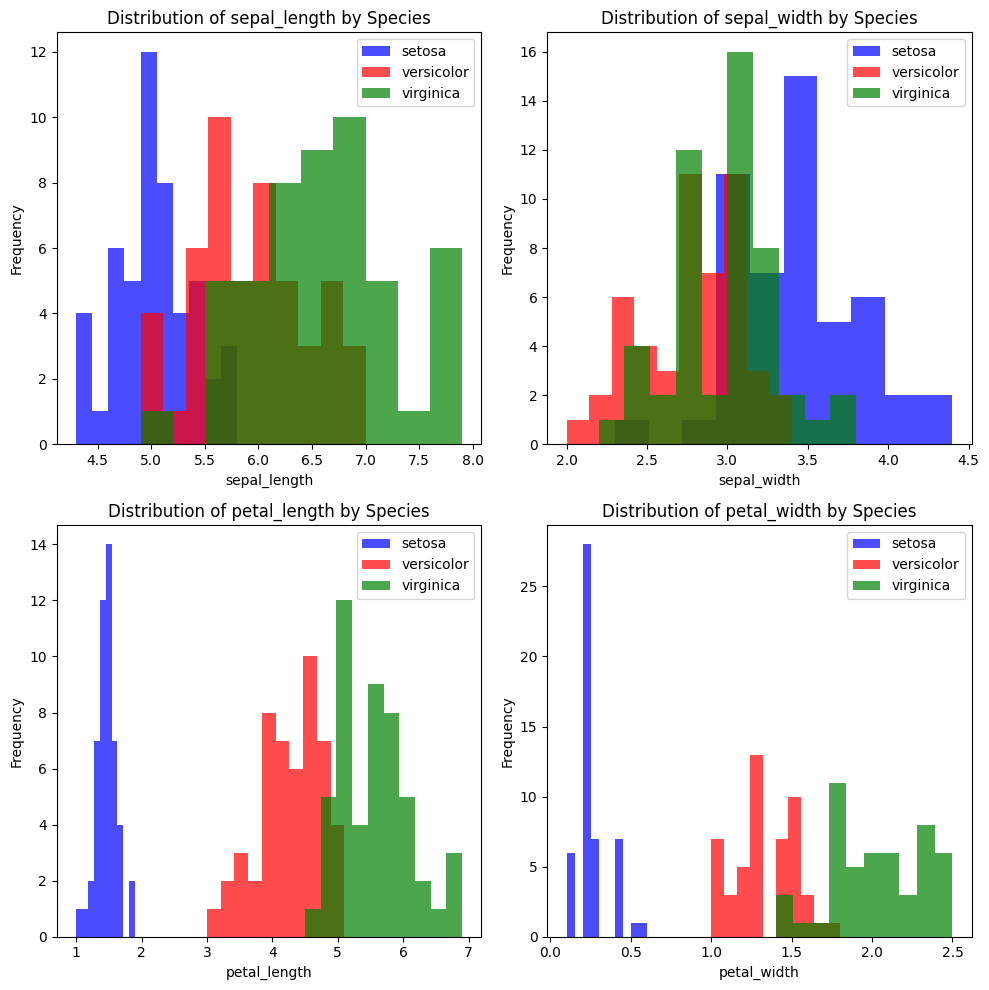

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
cols = df.columns.drop("species")

groups = df.species.unique()
styles = ["b", "r", "g"]

for i, col1 in enumerate(cols):
    ax = axes[i]
    for c, g in zip(styles, groups):
        dfFiltered = df[df.species == g]
        ax.hist(dfFiltered[col1], color=c, label=g, alpha=0.7)

    ax.set_title(f"Distribution of {col1} by Species")
    ax.set_xlabel(f"{col1}")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()

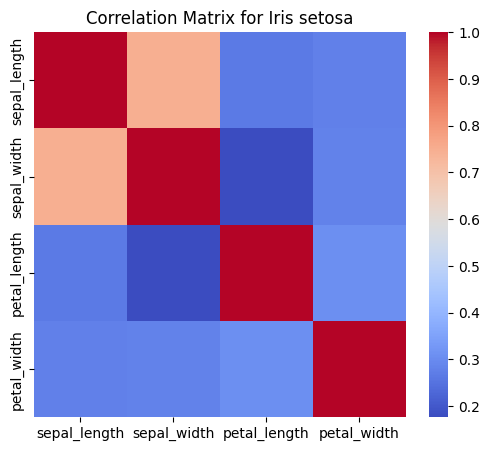

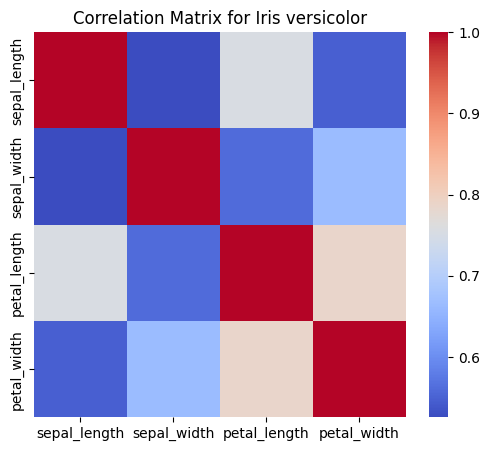

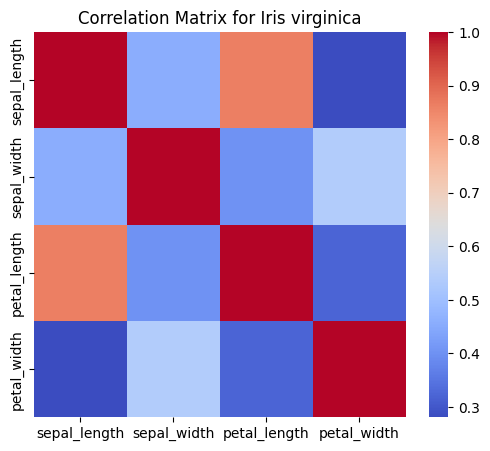

In [ ]:
import seaborn as sns

cols = df.species.unique()
for speciesName in cols:
    plt.figure(figsize=(6, 5))
    dfFiltered = df[df.species == speciesName].drop("species", axis=1)
    corrMatrix = dfFiltered.corr()

    sns.heatmap(corrMatrix, fmt=".2f", cmap="coolwarm")

    plt.title(f"Correlation Matrix for Iris {speciesName}")

Now we have some ideas about our data, we can move to feature engineering.


# Feature Engineering


In [ ]:
def pipeline(df):
    newDf = df.copy()

    newDf["petal_width^2"] = newDf["petal_width"] * newDf["petal_width"]
    newDf["petalW_petalL"] = newDf["petal_width"] * newDf["petal_length"]
    newDf["petalL_sepalW"] = newDf["petal_length"] * newDf["sepal_width"]
    newDf["petalL_sepalL"] = newDf["petal_length"] * newDf["sepal_length"]
    newDf["petalW_sepalL"] = newDf["petal_width"] * newDf["sepal_length"]

    return newDf

In [13]:
pipeline(df).head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_width^2,petalW_petalL,petalL_sepalW,petalL_sepalL,petalW_sepalL
0,5.1,3.5,1.4,0.2,setosa,0.04,0.28,4.90,7.14,1.02
1,4.9,3.0,1.4,0.2,setosa,0.04,0.28,4.20,6.86,0.98
2,4.7,3.2,1.3,0.2,setosa,0.04,0.26,4.16,6.11,0.94
3,4.6,3.1,1.5,0.2,setosa,0.04,0.30,4.65,6.90,0.92
4,5.0,3.6,1.4,0.2,setosa,0.04,0.28,5.04,7.00,1.00


# Fitting a model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def fitLogisticReg(df):

    X = df.drop("species", axis=1)
    y = df["species"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy of logistic reg without feature engineering: {fitLogisticReg(df)}")
print(
    f"Accuracy of logistic reg with feature engineering: {fitLogisticReg(pipeline(df))}"
)

Accuracy of logistic reg without feature engineering: 1.0
Accuracy of logistic reg with feature engineering: 1.0
